## Customer Segmentation Classification

### Context
An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work e exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./customer_segmentation/Train.csv')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


- ID Unique ID
- Gender Gender of the customer
- Ever_Married Marital status of the customer
- Age Age of the customer
- Graduated Is the customer a graduate?
- Profession Profession of the customer
- Work_Experience Work Experience in years
- Spending_Score Spending score of the customer
- Family_Size Number of family members for the customer (including the customer)
- Var_1 Anonymised Category for the customer
- Segmentation (target) Customer Segment of the customer

### Data Cleaning

In [3]:
df.duplicated().sum()

0

In [4]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

<AxesSubplot:>

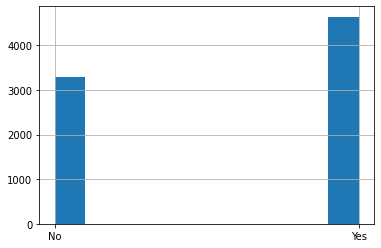

In [5]:
df['Ever_Married'].hist()

In [6]:
df['Ever_Married'].fillna(method='ffill',inplace=True)

In [7]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64


<AxesSubplot:xlabel='Work_Experience', ylabel='Count'>

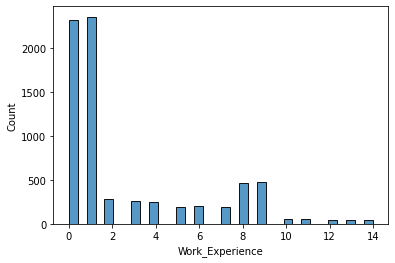

In [8]:
print(df['Work_Experience'].value_counts())
sns.histplot(data=df,x='Work_Experience')

In [9]:
#filling the missing Work_Experience data
df['Work_Experience'] = df['Work_Experience'].fillna(method='ffill')

In [10]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated           78
Profession         124
Work_Experience      0
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Text(0.5, 1.0, 'Profession Distribution')

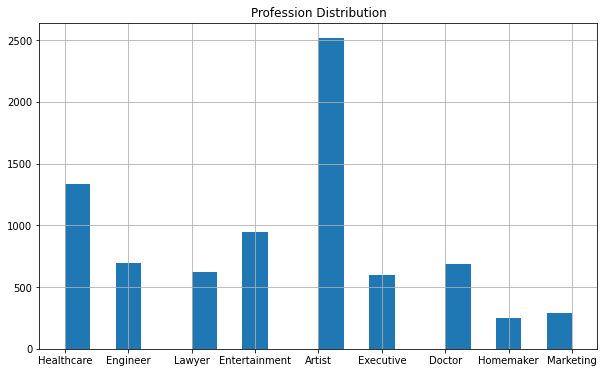

In [11]:
plt.figure(figsize=(10,6))
df['Profession'].hist(bins=20)
plt.title('Profession Distribution')

Text(0.5, 1.0, 'Graduated Distribution')

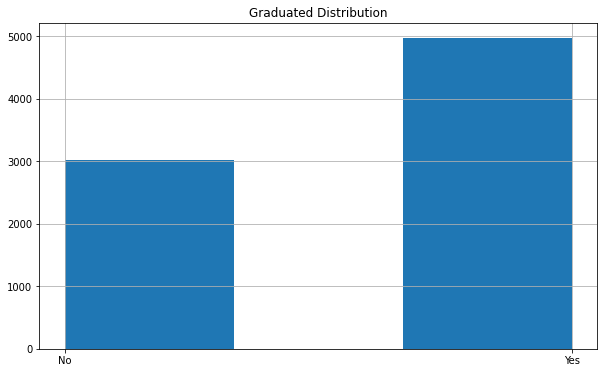

In [12]:
plt.figure(figsize=(10,6))
df['Graduated'].hist(bins=3)
plt.title('Graduated Distribution')

Text(0.5, 1.0, 'Family Size Distribution')

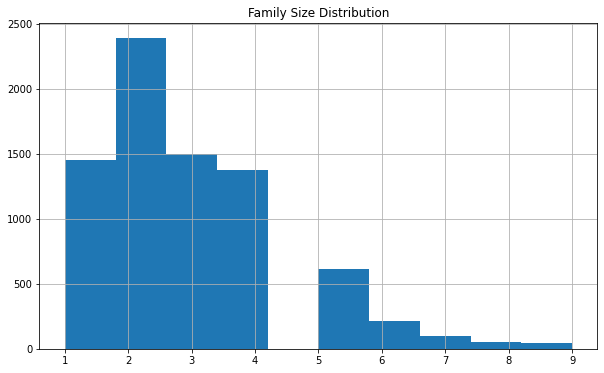

In [13]:
plt.figure(figsize=(10,6))
df['Family_Size'].hist(bins=10)
plt.title('Family Size Distribution')

Text(0.5, 1.0, 'Anonymous Variable Distribution')

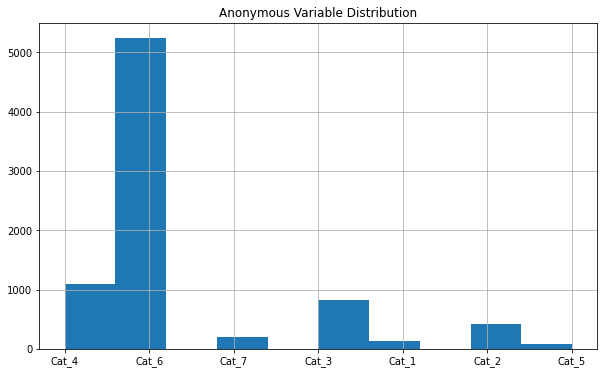

In [14]:
plt.figure(figsize=(10,6))
df['Var_1'].hist(bins=10)
plt.title('Anonymous Variable Distribution')

In [15]:
#filling the missing data for married, profession, family size and var 1
df['Var_1'] = df['Var_1'].fillna(method='ffill')
df['Family_Size'] = df['Family_Size'].fillna(method='ffill')
df['Graduated'] = df['Graduated'].fillna(method='ffill')
df['Profession'] = df['Profession'].fillna(method='ffill')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


##### There are no more null instance in the dataframe. However, the data type of the features are not the same. Three can be spotted right now: float, int and object. The next section will deal with the different datatypes.

### Data Preprocessing

Data can be categorical or numerical. Not all machine learning algorithms can handle categorical data as inputs. Artificial Neural Networks can only take numerical data as inputs. Therefore, it is a good thing to do to turn the data into numerical data.

In [17]:
df['Gender'].value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

In [18]:
# Change gender to numeric data
def change_gender(gender):
    if gender == 'Male':
        return 1
    else:
        return 0
df['Gender'] = df['Gender'].apply(change_gender)

In [19]:
categorical_features = ['Ever_Married','Graduated','Profession','Spending_score','Var_1']
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,0,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,0,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,1,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,0,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A


In [20]:
print(df['Ever_Married'].value_counts(),'\n', df['Graduated'].value_counts())

Yes    4722
No     3346
Name: Ever_Married, dtype: int64 
 Yes    5021
No     3047
Name: Graduated, dtype: int64


In [21]:
# change married and graduated data into numeric using lambda function
for i in categorical_features[0:2]:
    df[i] = df[i].apply(lambda x: 1 if x=='Yes' else 0)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,0,1,38,1,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,0,1,67,1,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,1,1,67,1,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,0,1,40,1,Entertainment,0.0,High,6.0,Cat_6,A


In [22]:
# Label encoder on Profession feature
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
y = le.fit_transform(df['Profession'])
df['Profession'] = y
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,Low,4.0,Cat_4,D
1,462643,0,1,38,1,2,1.0,Average,3.0,Cat_4,A
2,466315,0,1,67,1,2,1.0,Low,1.0,Cat_6,B
3,461735,1,1,67,1,7,0.0,High,2.0,Cat_6,B
4,462669,0,1,40,1,3,0.0,High,6.0,Cat_6,A


In [23]:
# label encoder for spending score and Var_1
categorical_features = ['Ever_Married','Graduated','Profession','Spending_Score','Var_1']
for i in categorical_features[-2:]:
    le = LabelEncoder()
    y = le.fit_transform(df[i])
    df[i] = y
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,2,4.0,3,D
1,462643,0,1,38,1,2,1.0,0,3.0,3,A
2,466315,0,1,67,1,2,1.0,2,1.0,5,B
3,461735,1,1,67,1,7,0.0,1,2.0,5,B
4,462669,0,1,40,1,3,0.0,1,6.0,5,A


In [24]:
df.drop('ID',inplace=True,axis=1)

In [25]:
df.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
count,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000
mean,0.547471,0.585275,43.466906,0.622335,2.792390,2.618741,1.359941,2.846678,4.138572
std,0.497772,0.492705,16.711696,0.484833,2.540883,3.394284,0.848418,1.530377,1.425436
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000
50%,1.000000,1.000000,40.000000,1.000000,3.000000,1.000000,2.000000,3.000000,5.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,2.000000,4.000000,5.000000
max,1.000000,1.000000,89.000000,1.000000,8.000000,14.000000,2.000000,9.000000,6.000000


### Splitting Data

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop('Segmentation',axis=1)
y = df['Segmentation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((6454, 9), (6454,), (1614, 9), (1614,))

### Normalization

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((6454, 9), (6454,), (1614, 9), (1614,))

## -------- Practical Exercise 3.6 starts here --------

### Training Machine Learning Models

#### Your task in this part of the exercise is to build a Logistic Regression and KNN model

#### Import the LogisticRegression and KNeihborsClassifier models

In [ ]:
# <write your code here>

#### Build and train two machine learning models:
1. Logistic Regression
2. KNN

#### You need to specify the number of neighbors in KNN, and the max_iter in Logistic Regression

In [ ]:
# <write your code here>

#### Obtain the list of predictions for each model from the test data as preparation for the evaluation we will do in the next practical exercise

#### Make sure to use the test data

In [44]:
# <write your code here>

## -------- Practical Exercise 3.6 ends here --------

## -------- Practical Exercise 4.8 starts here --------

### Evaluating the models

#### Compute the accuracy score for both Logistic Regression and KNN

In [ ]:
# <write your code here>

#### Compute the confusion matrix for both Logistic Regression and KNN

In [ ]:
# <write your code here>

#### Compute the precision score for both Logistic Regression and KNN

In [ ]:
# <write your code here>

#### Compute the recall score for both Logistic Regression and KNN

In [ ]:
# <write your code here>

#### Compute the f-measure score for both Logistic Regression and KNN

In [ ]:
# <write your code here>

#### According to the values obtained, which model do you think is better and why?

\<write your answer here\>

## -------- Practical Exercise 4.8 ends here --------